## **다중선형회귀 + 데이터로더**

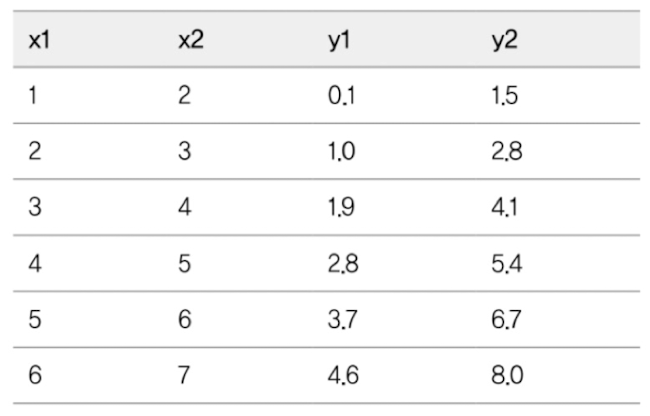

In [ ]:
# 필수 패키지 임포트
import torch
from torch import nn
from torch import optim
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
# 데이터셋 정의
train_x = torch.FloatTensor([
    [1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]
])
train_y = torch.FloatTensor([
    [0.1, 1.5], [1, 2.8], [1.9, 4.1], [2.8, 5.4], [3.7, 6.7], [4.6, 8]
])

In [ ]:
# STEP 0. 하이퍼 파라메터 설정
epochs = 20000
batch_size = 2

In [ ]:
# 데이터 로더
train_dataset = TensorDataset(train_x, train_y)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# STEP 1. 모델 설정
# 신경망에 입력 2개 노드, 출력 2개 노드, b값도 학습
model = nn.Linear(2,2,bias=True)

# STEP 2. 손실함수 정의
criterion = nn.MSELoss()

# STEP 3. 옵티마이저 설정
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
# STEP 4. 학습
for epoch in range(epochs):
    # 1 epoch 진행시 3번에 나누어져서 cost가 누적
    cost =0.0

    # 6개의 데이터를 3번에 나눠서 3step으로 진행
    for batch in train_dataloader:
        x, y = batch

        y_pred = model(x)
        loss = criterion(y_pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # 1epoch 동안엔 cost값을 누적한다.
        cost += loss

    cost = cost /len(train_dataloader)

    if epoch % 1000 == 0:
        print(f'Epoch: {epoch}, Cost: {cost.item()}')

Epoch: 0, Cost: 22.755186080932617
Epoch: 1000, Cost: 0.07274160534143448
Epoch: 2000, Cost: 0.045642729848623276
Epoch: 3000, Cost: 0.028857773169875145
Epoch: 4000, Cost: 0.018207667395472527
Epoch: 5000, Cost: 0.011682498268783092
Epoch: 6000, Cost: 0.007272988557815552
Epoch: 7000, Cost: 0.0046208999119699
Epoch: 8000, Cost: 0.002945901593193412
Epoch: 9000, Cost: 0.0018402058631181717
Epoch: 10000, Cost: 0.0011642618337646127
Epoch: 11000, Cost: 0.0007324891048483551
Epoch: 12000, Cost: 0.00046265075798146427
Epoch: 13000, Cost: 0.0002925174485426396
Epoch: 14000, Cost: 0.00018690689466893673
Epoch: 15000, Cost: 0.0001163712004199624
Epoch: 16000, Cost: 7.362321048276499e-05
Epoch: 17000, Cost: 4.7118188376771286e-05
Epoch: 18000, Cost: 2.9307417207746767e-05
Epoch: 19000, Cost: 1.8611593986861408e-05


In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[ 1.6883, -0.7906],
         [ 1.0930,  0.2056]], requires_grad=True)]

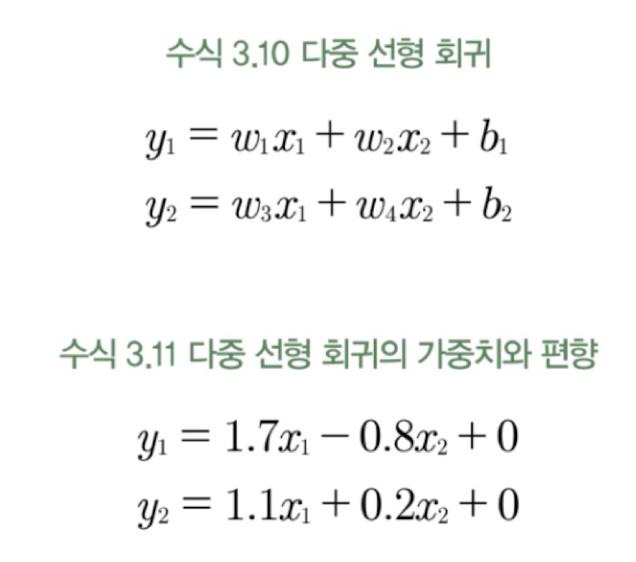

In [ ]:
# batch_size 2이므로 p_pred 2개
print(y_pred[:])
print(y[:])

tensor([[2.8006, 5.4003],
        [1.0050, 2.8030]], grad_fn=<SliceBackward0>)
tensor([[2.8000, 5.4000],
        [1.0000, 2.8000]])
